# Problem Statement

## Create a ML model  for Heart Disease Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
df.shape

(303, 14)

In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [14]:
df['oldpeak']=df['oldpeak'].astype('int64')

In [15]:
df.dtypes

age         int64
sex         int64
cp          int64
trestbps    int64
chol        int64
fbs         int64
restecg     int64
thalach     int64
exang       int64
oldpeak     int64
slope       int64
ca          int64
thal        int64
target      int64
dtype: object

In [16]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [22]:
cols=df.columns
for i in cols:
    print(i,df[i].unique(),sep='\n----------------------\n')

age
----------------------
[63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex
----------------------
[1 0]
cp
----------------------
[3 2 1 0]
trestbps
----------------------
[145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol
----------------------
[233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 34

### Observation
1.All Values are of int datatypes

2.There is no missing values in this dataset

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0,2,0,2,1


### Data Visualization

<AxesSubplot:>

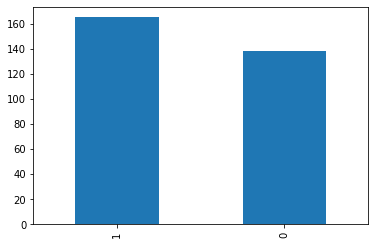

In [18]:
df['target'].value_counts().plot(kind='bar')


<Figure size 720x432 with 0 Axes>

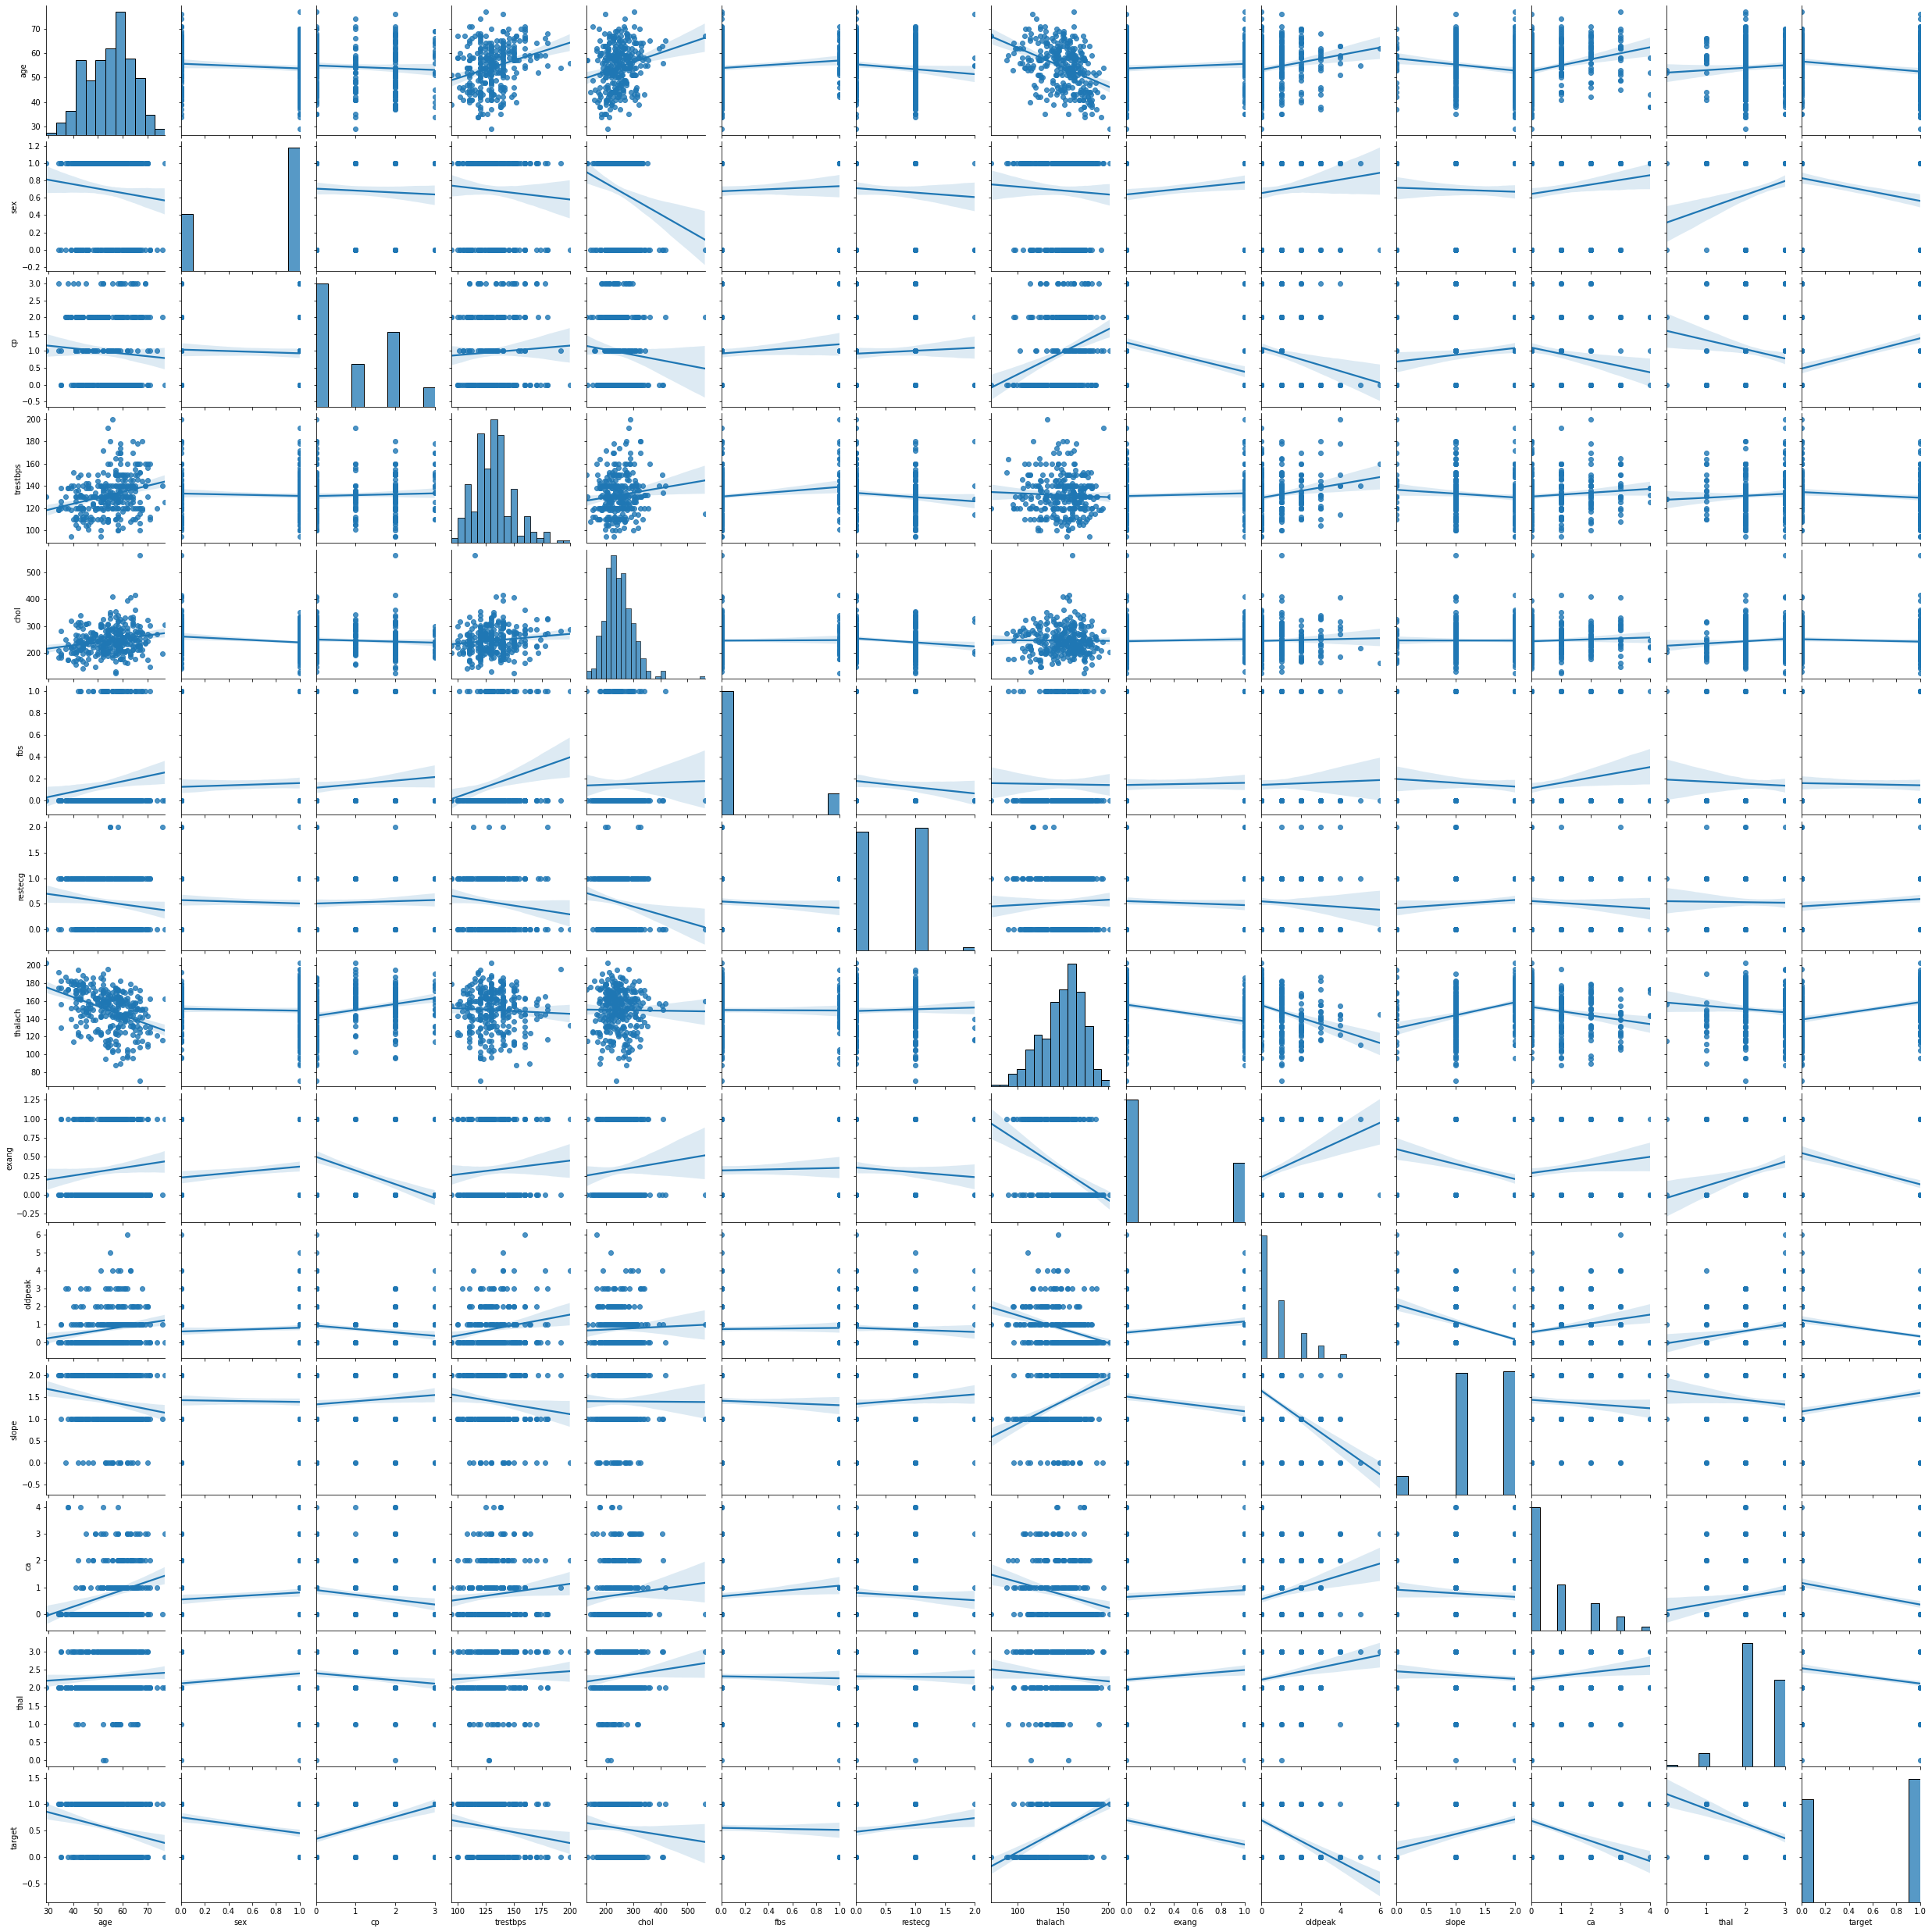

In [26]:
plt.figure(figsize=(10,6"))
sns.pairplot(df,kind='reg') 

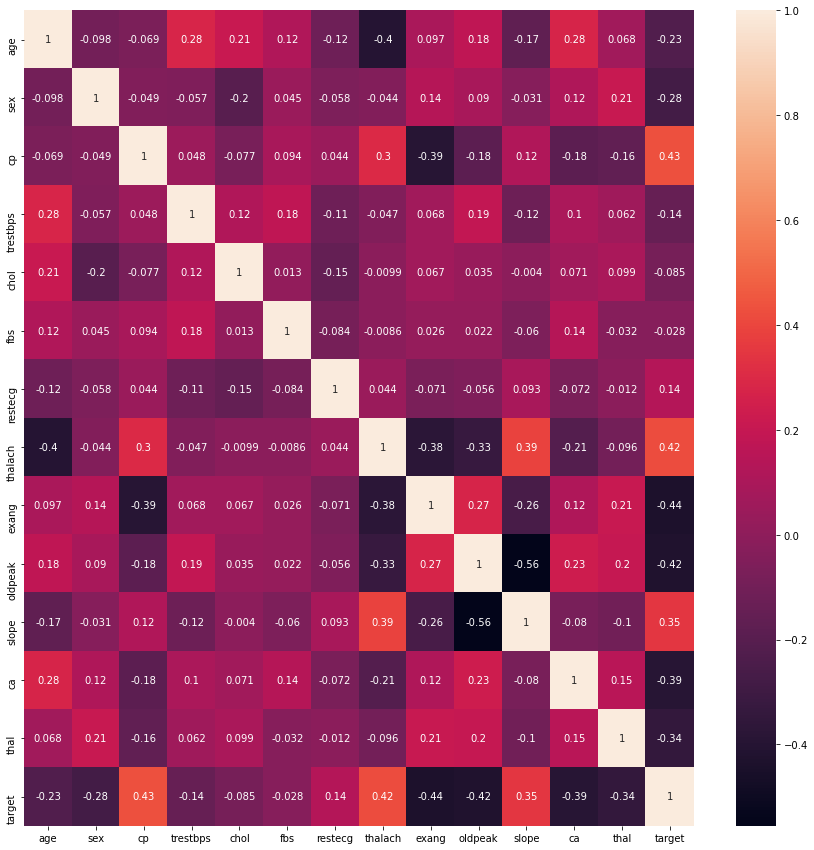

In [27]:
plt.figure(figsize=(15,15))
corrwith=sns.heatmap(df.corr(),annot=True)

In [28]:
categorical_col=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']


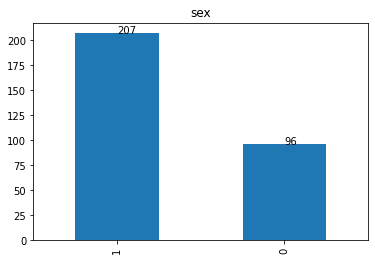

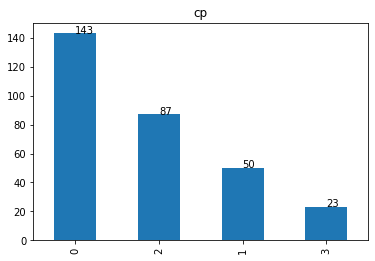

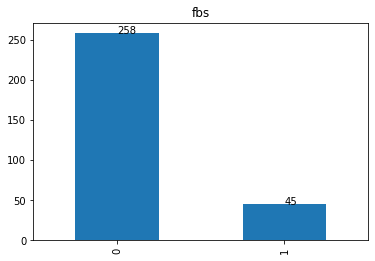

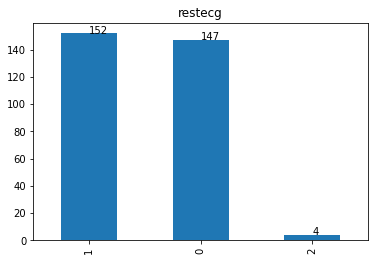

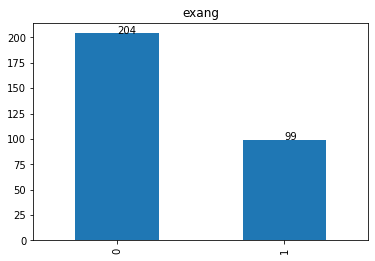

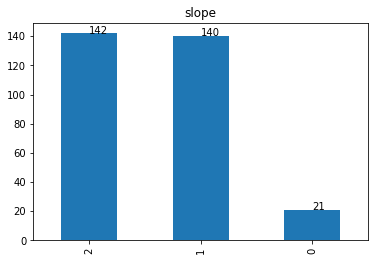

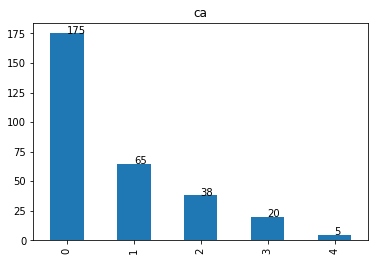

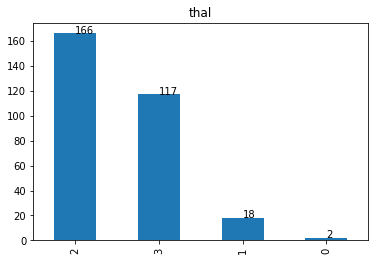

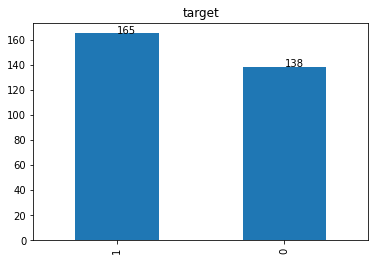

In [32]:
for col in categorical_col:
    f=df[col].value_counts().plot(kind='bar')
    plt.title(col)
    for i in f.patches:
        x=i.get_x() + i.get_width()/2
        y=i.get_y() + i.get_height()
        plt.annotate(i.get_height(),(x,y))
    plt.show()

### Obervation 
1.'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target' are categorical data and can be converted into numerical data using get_dummies


In [33]:
categorical_col.remove('target')
data=pd.get_dummies(df,columns=categorical_col)

In [34]:
data

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,115,1,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1


In [59]:
data['Male']= pd.get_dummies(data['sex_1'],drop_first=True) 
data.drop({'sex_0','sex_1'},axis=1)

,age,trestbps,chol,thalach,oldpeak,target,cp_0,cp_1,cp_2,cp_3,...,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3,Male
0,63,145,233,150,2,1,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1
1,37,130,250,187,3,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,1
2,41,130,204,172,1,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,56,120,236,178,0,1,0,1,0,0,...,1,0,0,0,0,0,0,1,0,1
4,57,120,354,163,0,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
299,45,110,264,132,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
300,68,144,193,141,3,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,1
301,57,130,131,115,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1


### Splitting Data into train and test dataset

In [63]:
x=data.drop('target',axis=1)# here x contain all colmns except target
y=data['target']

In [64]:
from sklearn.model_selection import train_test_split


In [68]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.25, random_state = 101)

### Training the Model

In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
xtrain2=xtrain[['thalach','cp_0','cp_1', 'cp_2', 'cp_3','slope_0', 'slope_1', 'slope_2','restecg_0', 'restecg_1','restecg_2']]# consider restecg colm also
xtest2=xtest[['thalach','cp_0','cp_1', 'cp_2', 'cp_3','slope_0', 'slope_1', 'slope_2','restecg_0', 'restecg_1','restecg_2']]

In [70]:
model_dt=DecisionTreeClassifier().fit(xtrain,ytrain)

In [71]:
model_dt.score(xtest,ytest)*100 # score with all features


78.94736842105263

In [73]:
model_dt1=DecisionTreeClassifier().fit(xtrain2,ytrain)

In [75]:
model_dt1.score(xtest2,ytest)*100 # score with all features


71.05263157894737

In [77]:
model_dt2=DecisionTreeClassifier().fit(xtrain2,ytrain)
model_dt.score(xtest,ytest)*100 # score with all features


78.94736842105263

In [78]:
model_rf=RandomForestClassifier().fit(xtrain,ytrain)

In [80]:
model_rf.score(xtest,ytest)*100# consider all features


84.21052631578947

In [81]:
model_rf.score(xtrain,ytrain)*100# all features


100.0

### Deployment

In [82]:
final_model = model_rf

In [83]:
pd.to_pickle(model_rf,'Heart Disease Predictor')

In [84]:
corr_df = data.corrwith(data['target']) 

In [86]:
corr_df*100

age          -22.543872
trestbps     -14.493113
chol          -8.523911
thalach       42.174093
oldpeak      -42.357236
target       100.000000
sex_0         28.093658
sex_1        -28.093658
cp_0         -51.601464
cp_1          24.587910
cp_2          31.674216
cp_3           8.695687
fbs_0          2.804576
fbs_1         -2.804576
restecg_0    -15.977519
restecg_1     17.532180
restecg_2     -6.841024
exang_0       43.675708
exang_1      -43.675708
slope_0       -6.355367
slope_1      -36.205330
slope_2       39.406637
ca_0          46.559012
ca_1         -23.241224
ca_2         -27.399787
ca_3         -21.061527
ca_4           6.644102
thal_0        -0.729263
thal_1       -10.658897
thal_2        52.733355
thal_3       -48.611215
Male         -28.093658
dtype: float64